# Cleaning

In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df_raw = pd.read_csv('HR-Employee-Attrition.csv')
df_raw.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df_raw.shape

(1470, 35)

## Remove Outliers

In [4]:
df_numericalvals = df_raw.loc[:, ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement','JobLevel', 'JobSatisfaction', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]
df_numericalvals

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,...,3,80,1,17,3,3,5,2,0,3
1466,39,613,6,1,1,2062,4,42,2,3,...,1,80,1,9,5,3,7,7,1,7
1467,27,155,4,3,1,2064,2,87,4,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,1023,2,3,1,2065,4,63,2,2,...,4,80,0,17,3,2,9,6,0,8


In [5]:
def plot_boxplot(df, feature):
    print(feature)
    df.boxplot(column=[feature])
    plt.grid(False)
    plt.show()

Age


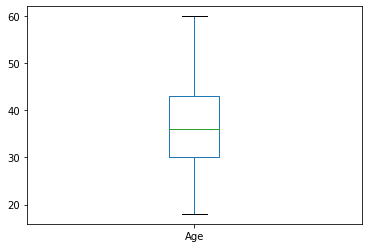

DailyRate


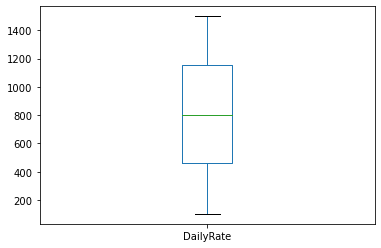

DistanceFromHome


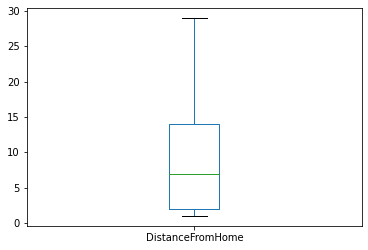

Education


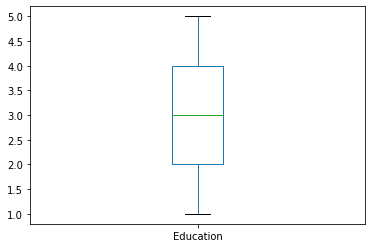

EmployeeCount


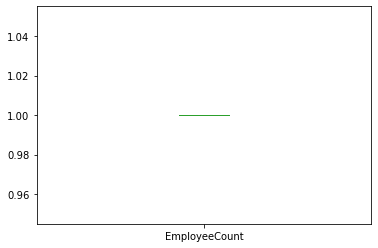

EmployeeNumber


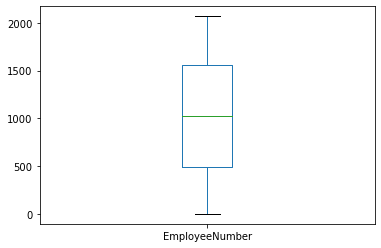

EnvironmentSatisfaction


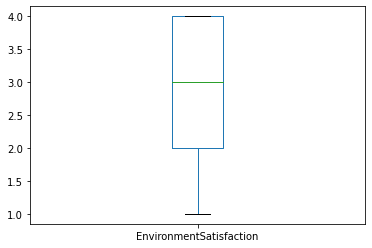

HourlyRate


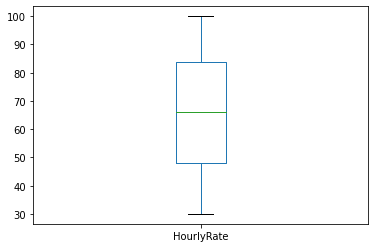

JobInvolvement


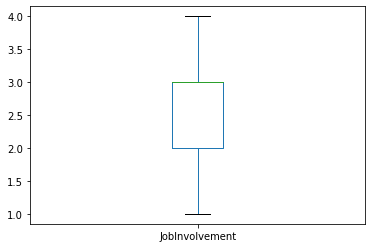

JobLevel


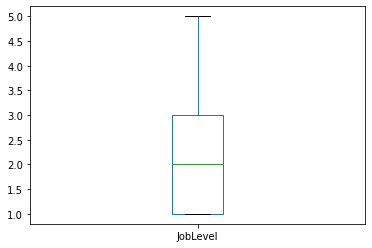

JobSatisfaction


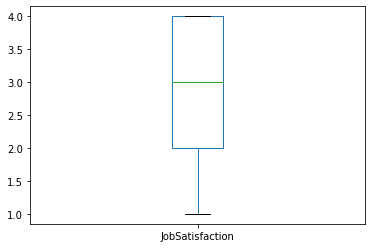

MonthlyRate


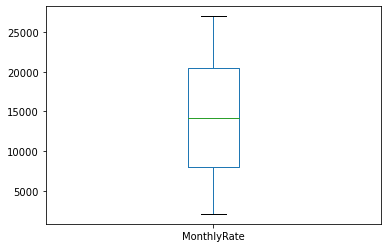

NumCompaniesWorked


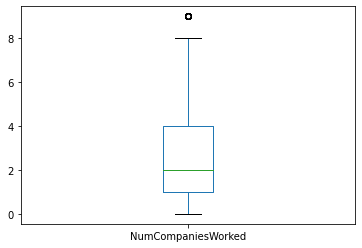

PercentSalaryHike


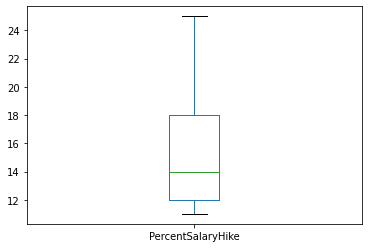

PerformanceRating


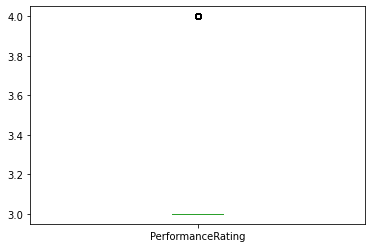

RelationshipSatisfaction


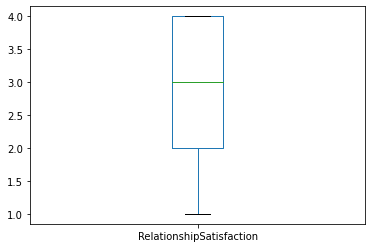

StandardHours


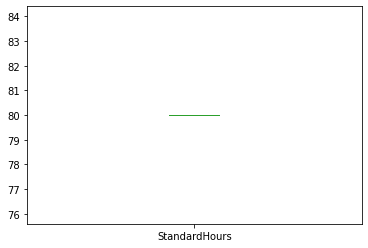

StockOptionLevel


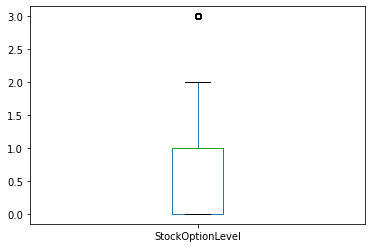

TotalWorkingYears


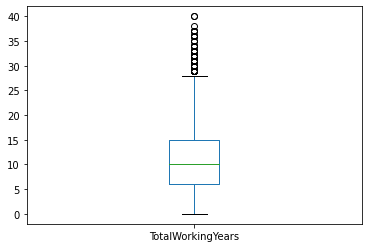

TrainingTimesLastYear


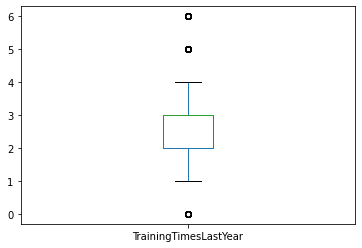

WorkLifeBalance


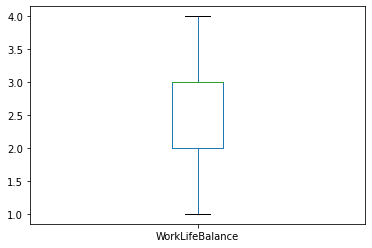

YearsAtCompany


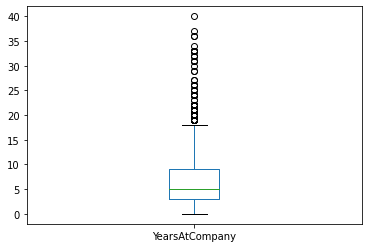

YearsInCurrentRole


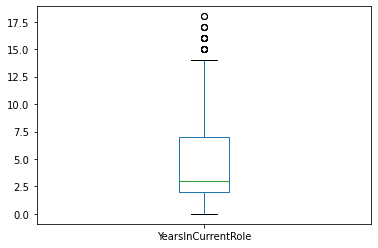

YearsSinceLastPromotion


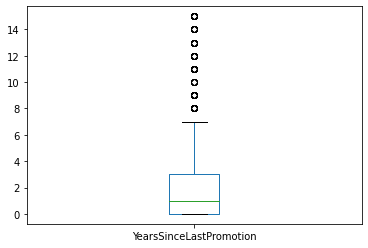

YearsWithCurrManager


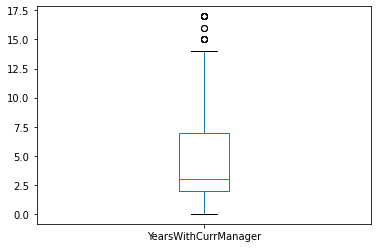

In [6]:
for columnName in df_numericalvals:
    plot_boxplot(df_numericalvals, columnName)

### There are several that have outliers, howver if the data is considered useful we will keep the outliers. 

In [7]:
def outliers(df, ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    ls = df.index[ (df[ft] < lower) | (df[ft] > upper) ]
    
    return ls
    

In [8]:
index_list = []

for feature in ['NumCompaniesWorked', 'StockOptionLevel', 'YearsWithCurrManager']:
    index_list.extend(outliers(df_raw, feature))

In [9]:
def remove(df, ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

In [10]:
df2 = remove(df_raw, index_list)
df2

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


## Remove Null Values

In [11]:
df2.notnull()
df_cleaned = df2.dropna()
df_cleaned

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


## One Hot Encoding

In [12]:
#Unnecessary columns
#df_cleaned = df_cleaned.drop(['Over18'], axis = 1)
#df_cleaned = df_cleaned.drop(['EmployeeNumber'], axis = 1)

#Binary= 'Attrition', 'Gender', 'OverTime',
#Categorical= 'BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus

In [13]:
df_cleaned['Attrition'].replace(('Yes', 'No'), (1, 0), inplace=True)
df_cleaned['Gender'].replace(('Male', 'Female'), (1, 0), inplace=True)
df_cleaned['OverTime'].replace(('Yes', 'No'), (1, 0), inplace=True)

In [14]:
#Remove categorical values
df = df_cleaned.drop(['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus', 'Over18', 'EmployeeNumber'], axis = 1)

In [15]:
dummies = pd.get_dummies(df_cleaned.BusinessTravel)
merged = pd.concat([df, dummies], axis = 1)

dummies2 = pd.get_dummies(df_cleaned.Department)
merged2 = pd.concat([merged, dummies2], axis = 1)

dummies3 = pd.get_dummies(df_cleaned.EducationField)
merged3 = pd.concat([merged2, dummies3], axis = 1)

dummies4 = pd.get_dummies(df_cleaned.JobRole)
merged4 = pd.concat([merged3, dummies4], axis = 1)

dummies5 = pd.get_dummies(df_cleaned.MaritalStatus)
final = pd.concat([merged4, dummies5], axis = 1)

final

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative,Divorced,Married,Single
0,41,1,1102,1,2,1,2,0,94,3,...,0,0,0,0,0,1,0,0,0,1
1,49,0,279,8,1,1,3,1,61,2,...,0,0,0,0,1,0,0,0,1,0
2,37,1,1373,2,2,1,4,1,92,2,...,1,0,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,1,4,0,56,3,...,0,0,0,0,1,0,0,0,1,0
5,32,0,1005,2,2,1,4,1,79,3,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,1,3,1,41,4,...,1,0,0,0,0,0,0,0,1,0
1466,39,0,613,6,1,1,4,1,42,2,...,0,0,0,0,0,0,0,0,1,0
1467,27,0,155,4,3,1,2,1,87,4,...,0,0,1,0,0,0,0,0,1,0
1468,49,0,1023,2,3,1,4,1,63,2,...,0,0,0,0,0,1,0,0,1,0


In [16]:
%store 'final'

Stored 'final' (DataFrame)


In [17]:
final.to_csv("final.csv")